In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['y_train.csv', 'sample_submission.csv', 'X_test.csv', 'X_train.csv']


In [2]:
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Activation,Flatten, Dense, Dropout
from keras.optimizers import RMSprop
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [3]:
x_train = pd.read_csv('../input/X_train.csv')
y_train = pd.read_csv('../input/y_train.csv')
x_test = pd.read_csv('../input/X_test.csv')

In [4]:
x_train.groupby('series_id').count().head(3)

,row_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
series_id,,,,,,,,,,,,
0,128,128,128,128,128,128,128,128,128,128,128,128
1,128,128,128,128,128,128,128,128,128,128,128,128
2,128,128,128,128,128,128,128,128,128,128,128,128


In [5]:
y_train['group_id'].unique()

array([13, 31, 20, 22,  1, 34, 33, 11, 26, 25, 12,  7, 21,  8,  9, 28, 15,
       27, 35, 32, 23, 14, 30,  3, 29, 16,  0, 10, 19,  4, 18,  6, 17,  5,
        2, 24, 69, 70, 71, 60, 62, 59, 45, 56, 41, 53, 40, 68, 49, 46, 42,
       38, 61, 43, 51, 44, 55, 65, 37, 57, 54, 72, 64, 66, 36, 48, 47, 52,
       39, 58, 50, 63, 67])

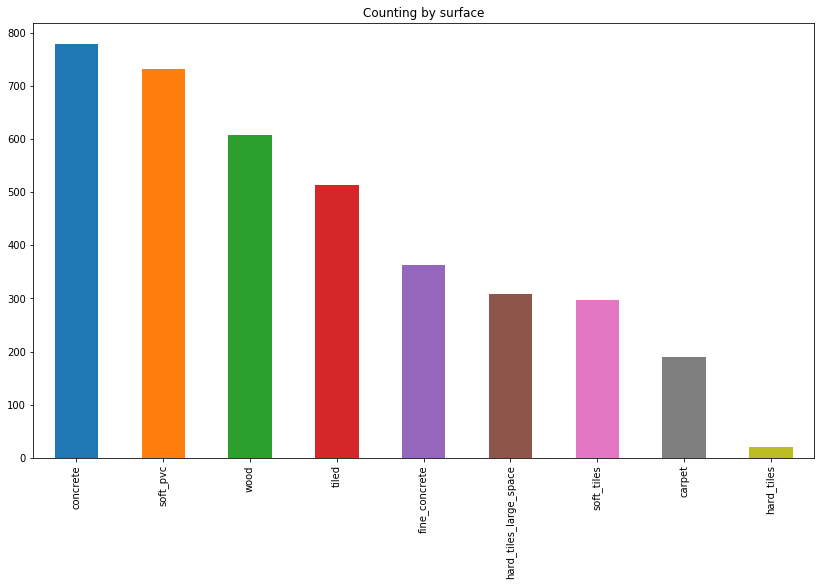

In [6]:
plt.figure(figsize = (10,10))
ax = y_train['surface'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Counting by surface")

In [7]:
x_train = x_train.drop(['row_id', "series_id", "measurement_number"], axis=1)
y_train = y_train.drop(['group_id', "series_id"], axis=1)
x_train =x_train.values.reshape((3810, 128, 10))
y_train =y_train.values.reshape((3810, 1))

In [8]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
print('y_train shape is {}'.format(str(y_train.shape)))

y_train shape is (3810,)


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
x_tr, x_te,y_tr, y_te = train_test_split(x_train, y_train, test_size = 0.15)
print(x_tr.shape, y_tr.shape, x_te.shape, y_te.shape)

(3238, 128, 10) (3238,) (572, 128, 10) (572,)


We can treat this as an image of shape 128x10 and we have 3238 such images

In [10]:

model = Sequential()
model.add(Conv1D(filters = 128, kernel_size = 7, strides = 1, padding = 'same', input_shape = (128,10),activation='relu'))
model.add(Conv1D(filters = 128, kernel_size = 7, strides = 1, padding = 'same',activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters = 64, kernel_size = 5, strides = 1, padding = 'same',activation='relu'))
model.add(Conv1D(filters = 64, kernel_size = 5, strides = 1, padding = 'same',activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = 'same',activation='relu'))
model.add(Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = 'same',activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(9, activation='softmax'))


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 128, 128)          9088      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 128, 128)          114816    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 64, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 64, 64)            41024     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 64, 64)            20544     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 32, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 32, 32)            6176      
__________

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
model_fit = model.fit(x_tr, y_tr,
                    batch_size=64,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_te, y_te))

Train on 3238 samples, validate on 572 samples
Epoch 1/50
3238/3238 [==============================] - 3s 1ms/step - loss: 1.8673 - acc: 0.2888 - val_loss: 1.7350 - val_acc: 0.3304
Epoch 2/50
3238/3238 [==============================] - 0s 126us/step - loss: 1.6564 - acc: 0.3595 - val_loss: 1.5439 - val_acc: 0.3497
Epoch 3/50
3238/3238 [==============================] - 0s 127us/step - loss: 1.5497 - acc: 0.3765 - val_loss: 1.4918 - val_acc: 0.4353
Epoch 4/50
3238/3238 [==============================] - 0s 126us/step - loss: 1.4497 - acc: 0.4373 - val_loss: 1.4620 - val_acc: 0.4388
Epoch 5/50
3238/3238 [==============================] - 0s 126us/step - loss: 1.3783 - acc: 0.4839 - val_loss: 1.4579 - val_acc: 0.4633
Epoch 6/50
3238/3238 [==============================] - 0s 126us/step - loss: 1.2911 - acc: 0.5191 - val_loss: 1.2831 - val_acc: 0.5280
Epoch 7/50
3238/3238 [==============================] - 0s 124us/step - loss: 1.2608 - acc: 0.5417 - val_loss: 1.3484 - val_acc: 0.5175
Epo

In [14]:
x_test = x_test.drop(['row_id', "series_id", "measurement_number"], axis=1)
x_test =x_test.values.reshape((3816, 128, 10))

In [15]:
prediction = model.predict(x_test)
prediction=np.argmax(prediction, axis=1)
y_preds = le.inverse_transform(prediction)

In [16]:
submission = pd.read_csv("../input/sample_submission.csv")
submission['surface'] = y_preds
submission.to_csv('lstm_with_Fully_connected_layers.csv', index=False)